# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [1]:
options(repos = c(CRAN = "https://cran.r-project.org"))
install.packages("tidyverse", dependencies = TRUE)
install.packages("rmarkdown", dependencies = TRUE)
install.packages("IRkernel", dependencies = TRUE)
install.packages("shiny", dependencies = TRUE)
install.packages("Rtsne", dependencies = TRUE)

IRkernel::installspec(user = FALSE)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘nanonext’, ‘mirai’, ‘watcher’


Warning message in install.packages("shiny", dependencies = TRUE):
“installation of package ‘nanonext’ had non-zero exit status”
Warning message in install.packages("shiny", dependencies = TRUE):
“installation of package ‘watcher’ had non-zero exit status”
Warning message in install.packages("shiny", dependencies = TRUE):
“installation of package ‘mirai’ had non-zero exit status”
Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)
library(Rtsne)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.0
✔ ggplot2   4.0.0     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [3]:
wine <- read.csv("wine.csv")
glimpse(wine)
sapply(wine[, sapply(wine, is.numeric)], summary)

Rows: 178
Columns: 14
$ Alcohol                       <dbl> 14.23, 13.20, 13.16, 14.37, 13.24, 14.20…
$ Malicacid                     <dbl> 1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.87…
$ Ash                           <dbl> 2.43, 2.14, 2.67, 2.50, 2.87, 2.45, 2.45…
$ Alcalinity_of_ash             <dbl> 15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.6…
$ Magnesium                     <int> 127, 100, 101, 113, 118, 112, 96, 121, 9…
$ Total_phenols                 <dbl> 2.80, 2.65, 2.80, 3.85, 2.80, 3.27, 2.50…
$ Flavanoids                    <dbl> 3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.52…
$ Nonflavanoid_phenols          <dbl> 0.28, 0.26, 0.30, 0.24, 0.39, 0.34, 0.30…
$ Proanthocyanins               <dbl> 2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.98…
$ Color_intensity               <dbl> 5.64, 4.38, 5.68, 7.80, 4.32, 6.75, 5.25…
$ Hue                           <dbl> 1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.02…
$ X0D280_0D315_of_diluted_wines <dbl> 3.92, 3.40, 3.17, 3.45, 2.93, 2.85, 3.58…
$ Proline         

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,X0D280_0D315_of_diluted_wines,Proline,class
Min.,11.03000,0.740000,1.360000,10.60000,70.00000,0.980000,0.34000,0.1300000,0.410000,1.28000,0.4800000,1.270000,278.0000,1.000000
1st Qu.,12.36250,1.602500,2.210000,17.20000,88.00000,1.742500,1.20500,0.2700000,1.250000,3.22000,0.7825000,1.937500,500.5000,1.000000
Median,13.05000,1.865000,2.360000,19.50000,98.00000,2.355000,2.13500,0.3400000,1.555000,4.69000,0.9650000,2.780000,673.5000,2.000000
Mean,13.00062,2.336348,2.366517,19.49494,99.74157,2.295112,2.02927,0.3618539,1.590899,5.05809,0.9574494,2.611685,746.8933,1.938202
3rd Qu.,13.67750,3.082500,2.557500,21.50000,107.00000,2.800000,2.87500,0.4375000,1.950000,6.20000,1.1200000,3.170000,985.0000,3.000000
Max.,14.83000,5.800000,3.230000,30.00000,162.00000,3.880000,5.08000,0.6600000,3.580000,13.00000,1.7100000,4.000000,1680.0000,3.000000


## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [4]:
#a
wine_scaled <- as.data.frame(wine) %>%
  mutate(across(where(is.numeric) & !all_of("class"),
                ~ as.numeric(scale(.))))
wine_scaled

#b Because PCA is a rotation, this is usually done around the center of the data. So centering is helpful in finding the centeroid for the PCA to rotate around. 

Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,X0D280_0D315_of_diluted_wines,Proline,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1.51434077,-0.56066822,0.23139979,-1.16630317,1.90852151,0.8067217,1.0319081,-0.65770780,1.22143845,0.251008784,0.3611585,1.84272147,1.01015939,1
0.24559683,-0.49800856,-0.82566722,-2.48384052,0.01809398,0.5670481,0.7315653,-0.81841060,-0.54318872,-0.292496232,0.4049085,1.11031723,0.96252635,1
0.19632522,0.02117152,1.10621386,-0.26798225,0.08810981,0.8067217,1.2121137,-0.49700500,2.12995937,0.268262912,0.3174085,0.78636920,1.39122370,1
1.68679140,-0.34583508,0.48655389,-0.80697481,0.92829983,2.4844372,1.4623994,-0.97911340,1.02925134,1.182731669,-0.4263410,1.18074072,2.32800680,1
0.29486844,0.22705328,1.83522559,0.45067448,1.27837900,0.8067217,0.6614853,0.22615759,0.40027531,-0.318377423,0.3611585,0.44833648,-0.03776747,1
1.47738706,-0.51591132,0.30430096,-1.28607930,0.85828399,1.5576991,1.3622851,-0.17559941,0.66234866,0.729810822,0.4049085,0.33565890,2.23274072,1
1.71142720,-0.41744613,0.30430096,-1.46574348,-0.26196936,0.3273744,0.4912911,-0.49700500,0.67982021,0.082781041,0.2736585,1.36384178,1.72465497,1
1.30493643,-0.16680747,0.88751034,-0.56742256,1.48842650,0.4871569,0.4812796,-0.41665360,-0.59560339,-0.003489596,0.4486584,1.36384178,1.74053265,1
2.25341491,-0.62332789,-0.71631546,-1.64540766,-0.19195352,0.8067217,0.9518167,-0.57735640,0.67982021,0.061213382,0.5361584,0.33565890,0.94664867,1


## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

#### c) Why are we doing PCA first?

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


Standard deviations (1, .., p=14):
 [1] 2.2797841 1.5802028 1.2025279 0.9608805 0.9317684 0.8131917 0.7435811
 [8] 0.5910663 0.5401830 0.5078404 0.4752135 0.4108322 0.3424757 0.2085970

Rotation (n x k) = (14 x 14):
                                       PC1          PC2           PC3
Alcohol                       -0.139554110 -0.483986584 -0.2073937774
Malicacid                      0.231278771 -0.224052306  0.0888801156
Ash                           -0.000758731 -0.315929724  0.6261495205
Alcalinity_of_ash              0.230293094  0.011263089  0.6120248225
Magnesium                     -0.131041028 -0.300236426  0.1308963493
Total_phenols                 -0.372792367 -0.066404359  0.1463803150
Flavanoids                    -0.403237284  0.002017377  0.1508538950
Nonflavanoid_phenols           0.278847444 -0.027604752  0.1701277248
Proanthocyanins               -0.291925075 -0.040561908  0.1497147503
Color_intensity                0.089426322 -0.529856997 -0.1372817801
Hue           

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2798 1.5802 1.2025 0.96088 0.93177 0.81319 0.74358
Proportion of Variance 0.3821 0.1836 0.1063 0.06789 0.06383 0.04862 0.04065
Cumulative Proportion  0.3821 0.5657 0.6721 0.73995 0.80378 0.85241 0.89306
                           PC8     PC9    PC10   PC11    PC12    PC13   PC14
Standard deviation     0.59107 0.54018 0.50784 0.4752 0.41083 0.34248 0.2086
Proportion of Variance 0.02569 0.02145 0.01896 0.0166 0.01241 0.00862 0.0032
Cumulative Proportion  0.91875 0.94020 0.95916 0.9758 0.98818 0.99680 1.0000

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,X0D280_0D315_of_diluted_wines,Proline,class
PC1,-0.13955411,0.23127877,-0.000758731,0.23029309,-0.13104103,-0.37279237,-0.403237284,0.27884744,-0.29192508,0.08942632,-0.284731497,-0.36064994,-0.27641244,0.3110235281
PC2,-0.48398658,-0.22405231,-0.315929724,0.01126309,-0.30023643,-0.06640436,0.002017377,-0.02760475,-0.04056191,-0.52985700,0.278364629,0.16336820,-0.36566189,-0.0048166342
PC3,-0.20739378,0.08888012,0.626149520,0.61202482,0.13089635,0.14638031,0.150853895,0.17012772,0.14971475,-0.13728178,0.085287218,0.16612694,-0.12670975,0.0009623389
PC4,-0.05202454,0.50792619,-0.234839101,0.06750549,-0.25528136,0.19504272,0.148853644,-0.27078415,0.43527140,0.06919472,-0.436095641,0.17104798,-0.24708206,0.0785549229
PC5,0.26128775,0.09224016,0.120560926,-0.05695664,-0.75961835,0.14215523,0.107843453,0.47058669,-0.12361143,0.05497895,0.097894204,0.12525099,0.12092559,-0.1301334861
PC6,0.16536102,0.58008658,0.125924371,-0.09534441,0.10479264,-0.12544691,-0.046749718,-0.25340042,-0.49254225,-0.42598886,0.050926361,0.23652420,0.08811233,-0.1665133820
PC7,0.08109663,-0.38986636,0.161456922,0.27494282,-0.32783323,0.03482640,0.065571524,-0.60671679,-0.40687583,0.19989161,-0.205092801,0.06766169,-0.06157391,0.0523084349
PC8,0.41085968,0.07811783,-0.171511416,0.42011625,-0.15219546,-0.38223991,-0.180723075,-0.23206171,0.35471193,-0.03762399,0.463538356,-0.07290702,0.11513687,0.0521340698
PC9,-0.48056233,0.03061612,0.286299064,-0.15910053,-0.26275246,-0.35387300,-0.072503670,-0.17571862,0.24105395,-0.06894372,-0.157966956,-0.10633712,0.56477893,-0.1111169252
PC10,0.26657031,-0.32214644,-0.081445765,0.11386621,0.10095846,-0.32340394,-0.150837960,0.23033372,0.12403042,-0.24930845,-0.523691016,0.48422273,0.04337797,-0.1638009613


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,X0D280_0D315_of_diluted_wines,Proline,class,PC1,PC2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,1.5143408,-0.56066822,0.2313998,-1.1663032,1.90852151,0.8067217,1.0319081,-0.6577078,1.2214385,0.2510088,0.3611585,1.8427215,1.01015939,1,-3.432664,-1.4457084
2,0.2455968,-0.49800856,-0.8256672,-2.4838405,0.01809398,0.5670481,0.7315653,-0.8184106,-0.5431887,-0.2924962,0.4049085,1.1103172,0.96252635,1,-2.398976,0.3302489
3,0.1963252,0.02117152,1.1062139,-0.2679823,0.08810981,0.8067217,1.2121137,-0.4970050,2.1299594,0.2682629,0.3174085,0.7863692,1.39122370,1,-2.672832,-1.0320368
4,1.6867914,-0.34583508,0.4865539,-0.8069748,0.92829983,2.4844372,1.4623994,-0.9791134,1.0292513,1.1827317,-0.4263410,1.1807407,2.32800680,1,-3.846566,-2.7563678
5,0.2948684,0.22705328,1.8352256,0.4506745,1.27837900,0.8067217,0.6614853,0.2261576,0.4002753,-0.3183774,0.3611585,0.4483365,-0.03776747,1,-1.249386,-0.8660395
6,1.4773871,-0.51591132,0.3043010,-1.2860793,0.85828399,1.5576991,1.3622851,-0.1755994,0.6623487,0.7298108,0.4049085,0.3356589,2.23274072,1,-3.186757,-2.1215204


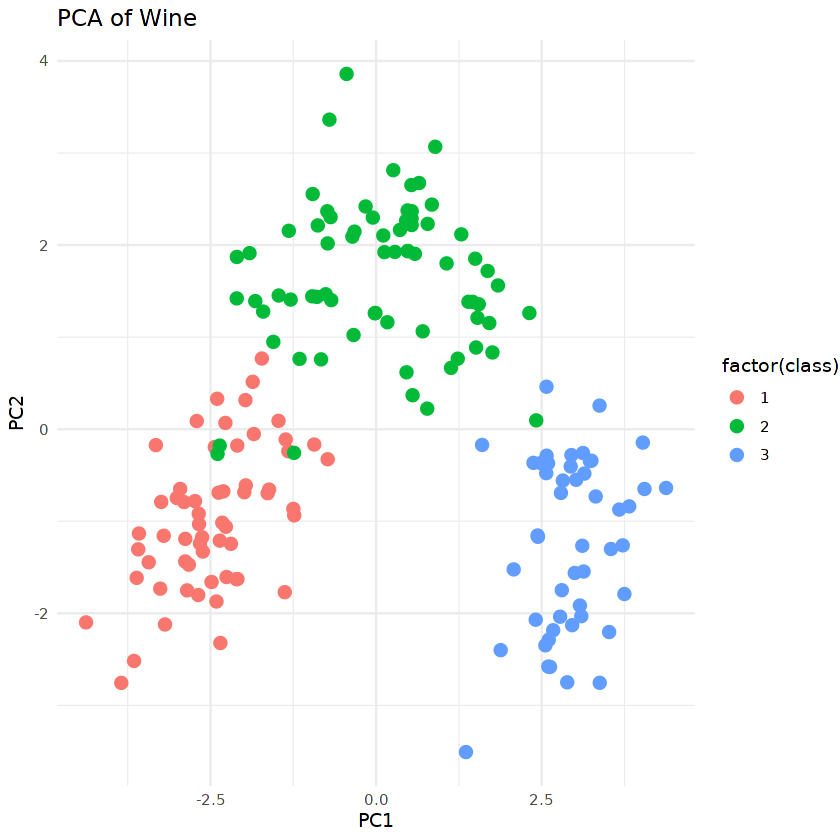

In [5]:
#a
r <- prcomp(wine_scaled)
r
summary(r)

#b 
# 0.3821 of the total variance is explained by PC1. 0.1836 of the total variance is explained by PC2. We use the summary() function to see that information.

#c
#PCA is performed first st reduce dimensionality and remove overlapping information before doing any additional more complex data analysis. 

#d rotation matrix
R <- solve(r$rotation)
R

#e 
pca_wine <- wine_scaled %>%
  mutate(
    PC1 = r$x[,1],
    PC2 = r$x[,2]
  )

head(pca_wine)

ggplot(pca_wine, aes(x = PC1, y = PC2, color = factor(class))) +
  geom_point(size = 3) +
  theme_minimal() +
  labs(title = "PCA of Wine")

#f I see three distinct clusters of the data that are based on class. In context of wine classes, this must mean that each class of wine shares similar chemical properties. 

#g PCA would fail on any sort of dataset that is circular in nature, as rotation would not separte the axes

#h a vector space is a set of vectors and a particular field that satisfy a particular set of axioms. A set that resembles a vector space locally is a manifold. 

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?


#### d) What other types of data does this workflow make sense for?



PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
-3.432664,-1.44570838,-0.1646967,-0.11137202,-0.72178310,0.27367092,-0.5802513250,-0.05970499,-0.540389836,1.046853883,1
-2.398976,0.33024886,-2.0209094,-0.35787267,0.28904410,0.90493417,0.0024623305,-1.01469912,0.265935119,0.056482523,1
-2.672832,-1.03203676,0.9803100,0.69684067,0.31781779,-0.49550144,-0.4668109245,0.30100865,1.207631792,0.001472536,1
-3.846566,-2.75636784,-0.1749490,0.56707736,0.30599251,-0.20998942,0.3929915784,-0.62845671,-0.083161946,0.156146471,1
-1.249386,-0.86603950,2.0204630,-0.42533331,-0.24300856,0.52893502,-0.4462164492,-0.42606864,-0.293472798,0.036804728,1
-3.186757,-2.12152038,-0.6273790,-0.56787497,0.51413575,-0.20284660,-0.3852755477,-0.37842340,0.096252503,-0.173023948,1
-2.626935,-1.17437339,-0.9744946,-0.21729242,1.04224983,0.52797142,-0.0004558217,0.35895833,0.537999389,0.887368724,1
-2.257906,-1.60595728,0.1455331,-1.22544959,-0.11991627,1.41268903,0.0571587353,-0.22163042,-0.084965687,0.670476756,1
-2.677574,-0.91883200,-1.7659609,-0.05618585,0.88051905,0.04362512,-0.0975424293,0.51453559,-0.569722003,0.261201686,1


V1,V2,class
<dbl>,<dbl>,<int>
31.81003,-10.233159,1
22.42745,-3.228069,1
21.44446,-15.171532,1
28.47431,-14.932845,1
14.27667,-12.840006,1
26.30565,-16.030729,1
24.34918,-7.572281,1
17.88185,-9.717277,1
25.46748,-8.741021,1


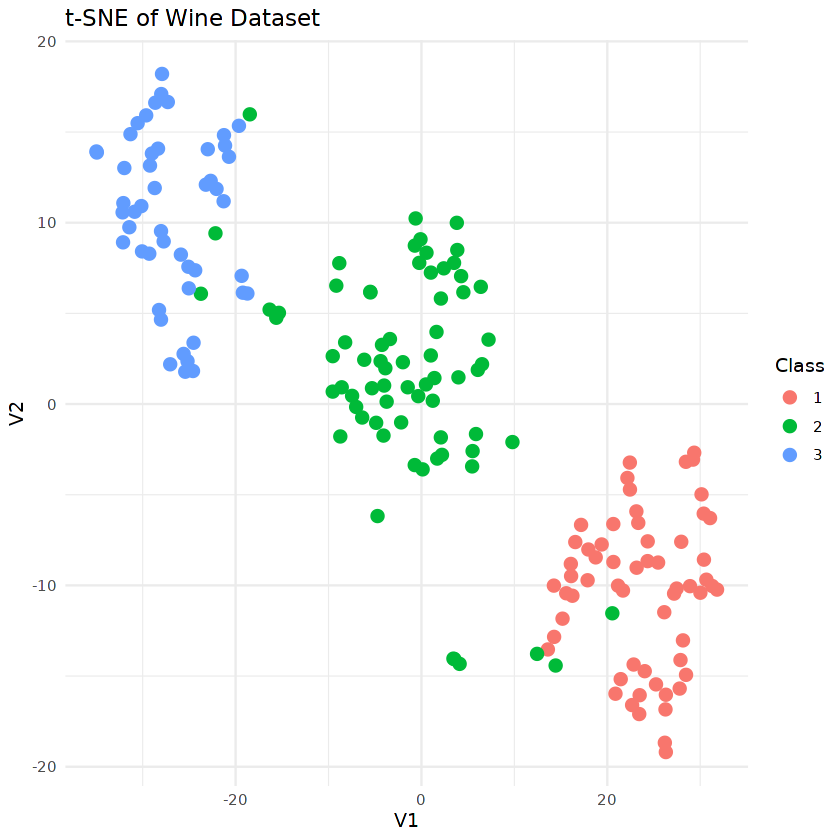

In [13]:
#a
wine_tsne <- as.data.frame(r$x[, 1:10])
wine_tsne <- wine_tsne %>%
    mutate (class=wine$class) %>%
    distinct()
wine_tsne
set.seed(123)
tsne_results <- Rtsne(wine_tsne[, 1:10], perplexity = 10)

#b
tsne_plot <- as_tibble(tsne_results$Y) %>%  
  mutate(class = wine_tsne$class)  
tsne_plot

library(ggplot2)
ggplot(tsne_plot, aes(x = V1, y = V2, color = factor(class))) +
  geom_point(size = 3) +
  theme_minimal() +
  labs(title = "t-SNE of Wine Dataset", color = "Class")

#c  t-SNE optimizes the placement of points and is better for visualizations. 

#d high dimensional datasets where you may want to visuazlie clusters would be good for this t-sne workflow. Genomic data is a good example of this kind of data.